So, begin with data preparation.

In [200]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

dataFrame = pd.read_csv("./dataset.csv",sep=";",encoding="cp1251",decimal=",",na_values=[""],keep_default_na=False)

dataFrame.head()


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


In [201]:
#Separate target and input + Check if there are any missings
y=dataFrame[dataFrame.columns[1]]
X=dataFrame[dataFrame.columns[2:]]
print(pd.isnull(X).sum())


def MakeBarChart(X,Y,title,figsize=(10,8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sb.set_style("whitegrid")

    sb.set_context("talk")
    ax = sb.barplot(x=X, y=Y)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    

AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   1367
GEN_TITLE                      1367
ORG_TP_STATE                   1367
ORG_TP_FCAPITAL                1365
JOB_DIR                        1367
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     295
REGION_NM                         1
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL                    0
OWN_AUTO                          0
AUTO_RUS_FL                 

Trying GEN_INDUSTRY
Got numbers


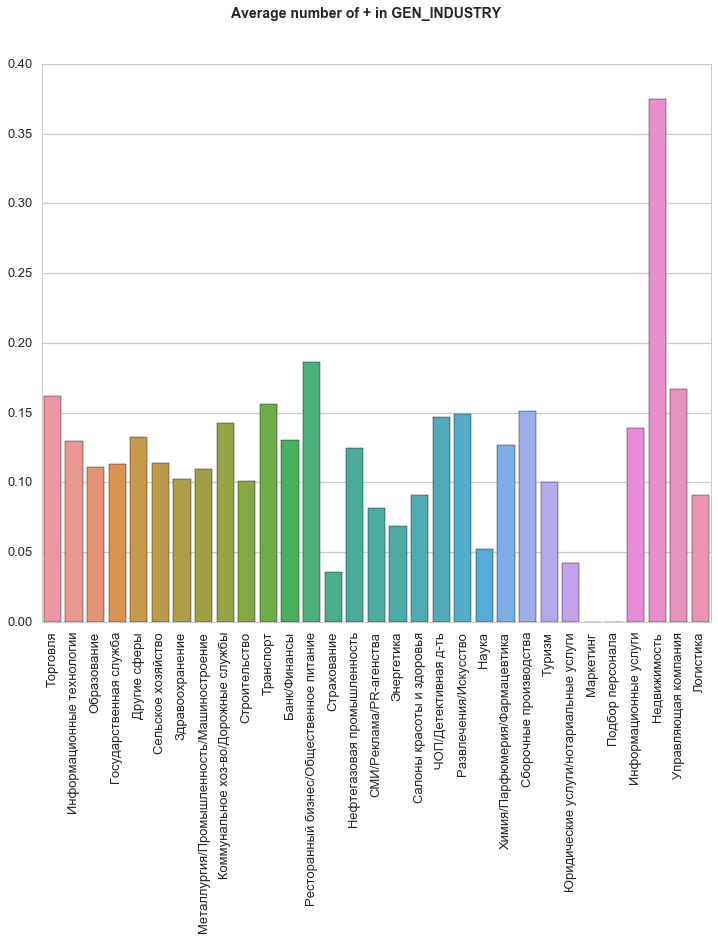

Trying GEN_TITLE
Got numbers


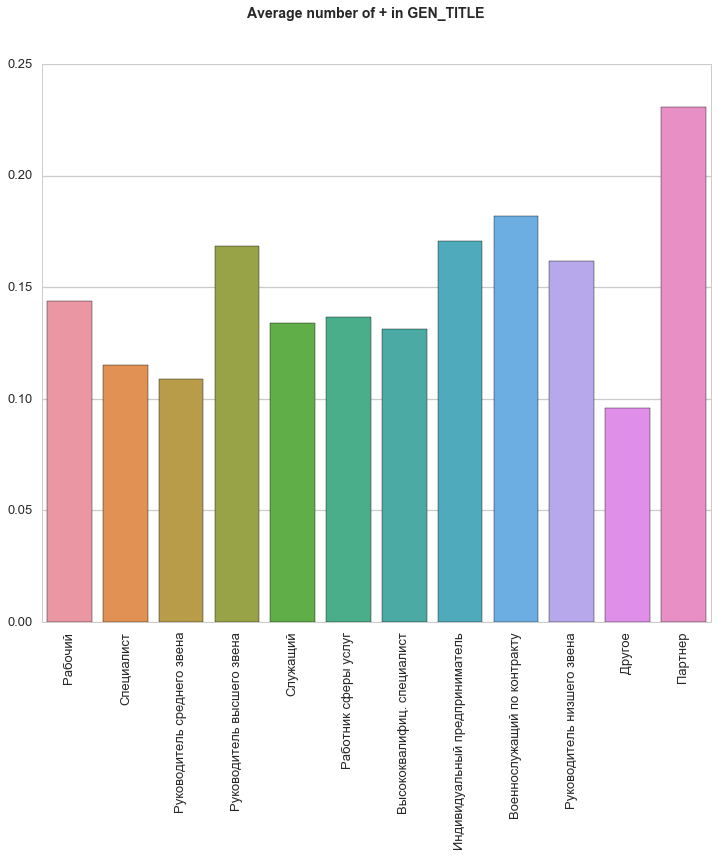

Trying ORG_TP_STATE
Got numbers


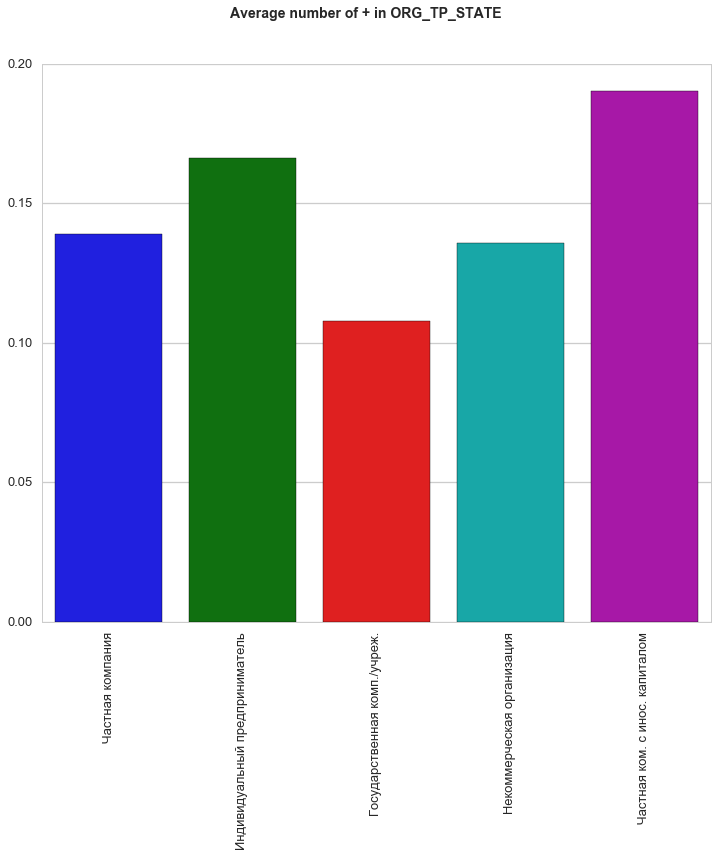

Trying ORG_TP_FCAPITAL
Got numbers


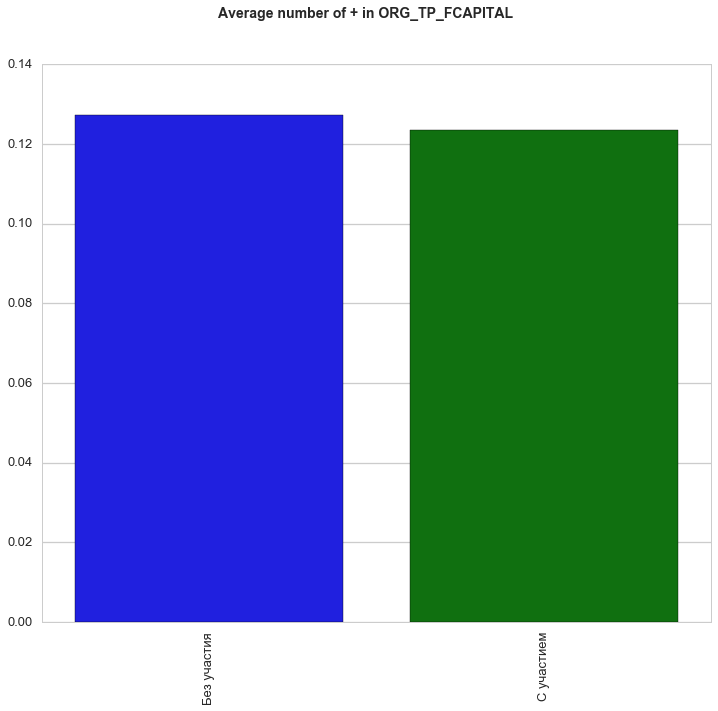

Trying JOB_DIR
Got numbers


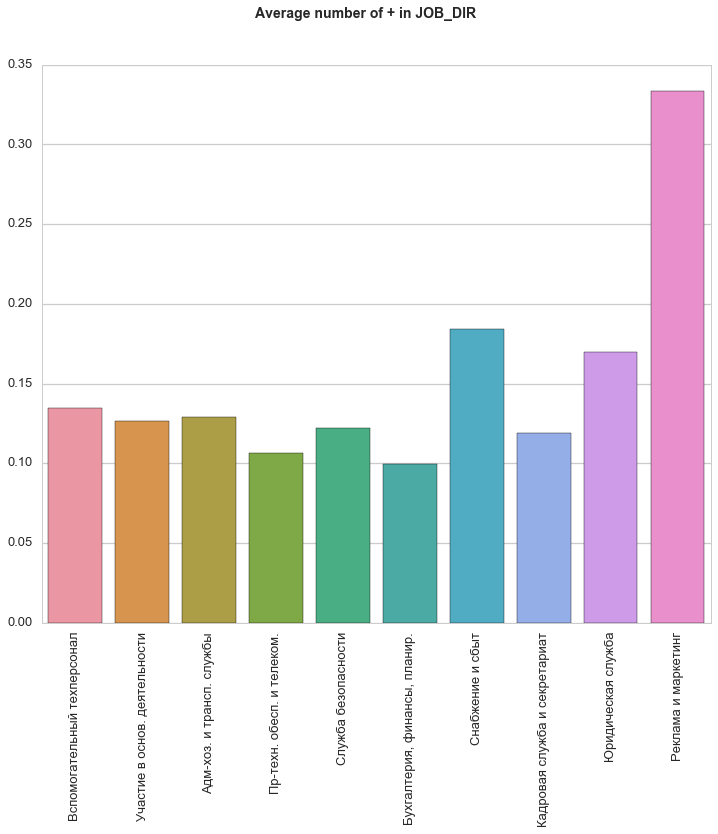

Trying TP_PROVINCE
Got numbers


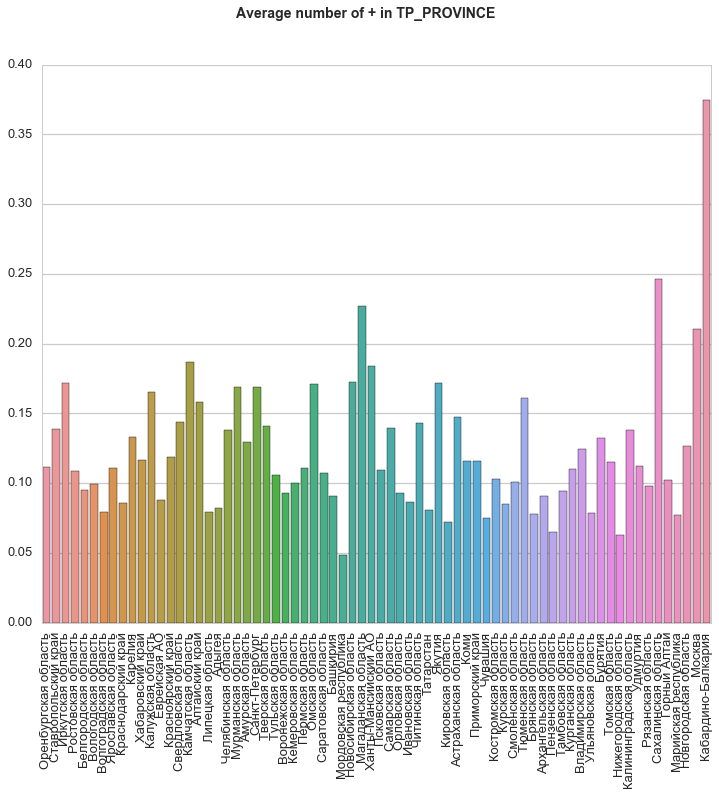

Trying REGION_NM
Got numbers


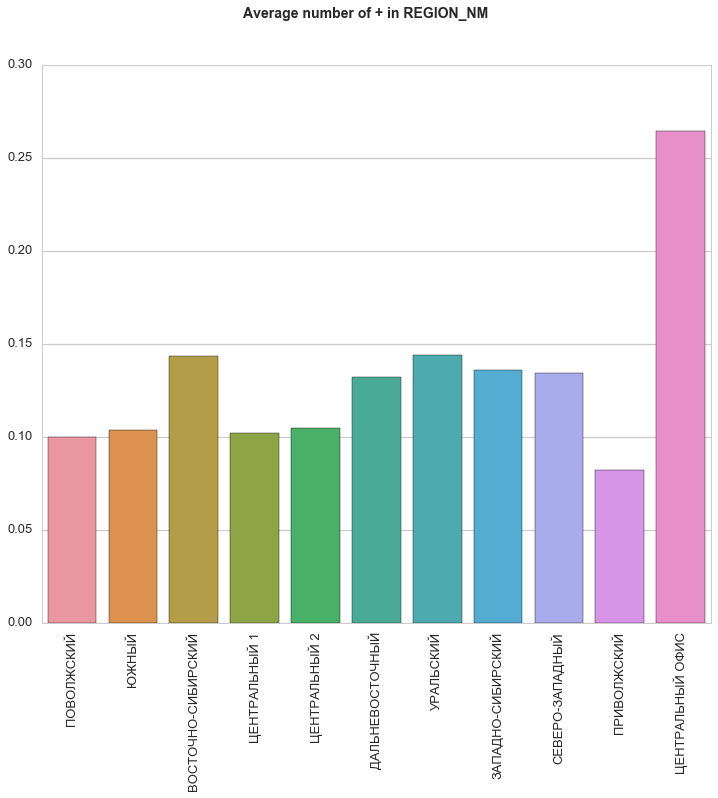

In [202]:
barplots=["GEN_INDUSTRY","GEN_TITLE","ORG_TP_STATE","ORG_TP_FCAPITAL","JOB_DIR","TP_PROVINCE","REGION_NM"]
#WORK_TIME, FCT_LIVING_TERM are dropped because they are not realistic


for el in barplots:
    print("Trying "+el)
    cats=pd.unique(X[el])
    
    catsSizes=[np.sum([int(X[el][n]==cats[k]) for n in range(0,len(X[el]))]) for k in range(0,len(cats))]
    catsMasks = [X[el]==cats[k] for k in range(0,len(cats))]
    positives=[np.sum(y[catsMasks[k]])/catsSizes[k] for k in range(0,len(cats))]
    print("Got numbers")
    #print(positives)
    #print(cats)
    MakeBarChart(cats,positives,"Average number of + in "+el,figsize=(12,10))
    
  

In [232]:
X_1=X[X.columns[list(range(0,37))+list(range(39,50))]]

y=y[~pd.isnull(X_1['REGION_NM'])]
X_1 = X_1[~pd.isnull(X_1['REGION_NM'])]
#transform last column NAN to 0
pd.unique(X_1['REGION_NM'])

array(['ПОВОЛЖСКИЙ', 'ЮЖНЫЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'ЦЕНТРАЛЬНЫЙ 1',
       'ЦЕНТРАЛЬНЫЙ 2', 'ДАЛЬНЕВОСТОЧНЫЙ', 'УРАЛЬСКИЙ',
       'ЗАПАДНО-СИБИРСКИЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ПРИВОЛЖСКИЙ',
       'ЦЕНТРАЛЬНЫЙ ОФИС'], dtype=object)

In [233]:

from sklearn import preprocessing

X_1["PREVIOUS_CARD_NUM_UTILIZED"][pd.isnull(X_1["PREVIOUS_CARD_NUM_UTILIZED"])]=0
X_1["GEN_INDUSTRY"][pd.isnull(X_1["GEN_INDUSTRY"])]="NaN"  
X_1["GEN_TITLE"][pd.isnull(X_1["GEN_TITLE"])]="NaN" 
X_1["ORG_TP_STATE"][pd.isnull(X_1["ORG_TP_STATE"])]="NaN" 
X_1["ORG_TP_FCAPITAL"][pd.isnull(X_1["ORG_TP_FCAPITAL"])]="NaN" 
X_1["JOB_DIR"][pd.isnull(X_1["JOB_DIR"])]="NaN" 
X_1["TP_PROVINCE"][pd.isnull(X_1["TP_PROVINCE"])]="NaN" 

cat_features_mask = (X_1.dtypes=="object").values
# кодирование категорий-строк натуральными числами
label_enc = preprocessing.LabelEncoder()
for feature in X_1.columns[cat_features_mask]: 
    print(feature)
    X_1[feature] = label_enc.fit_transform(X_1[feature])


# применение one-hot ecnoding
enc = preprocessing.OneHotEncoder(sparse=False)
X_cat_np = enc.fit_transform(X_1[X_1.columns[cat_features_mask]])
X_cat_pd = pd.DataFrame(data=X_cat_np)

X_cat_pd.head()

 

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM


,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [234]:
X_cat_pd.drop(enc.feature_indices_[:-1], axis=1, inplace=True)

In [261]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
sel=SelectKBest(mutual_info_classif, k=200).fit(X_cat_pd, y)
X_sel = sel.transform(X_cat_pd)
X_sel.shape

(15222, 200)

In [263]:
(sel.scores_>0.0001).sum()

185

In [267]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=175)
ipca.fit(X_sel)
X_sel_pca1=ipca.transform(X_sel) 
ipca.singular_values_

array([ 81.28665432,  75.28611373,  67.4442343 ,  63.44355039,
        59.75299869,  53.20563104,  51.15410218,  49.87234834,
        47.5376897 ,  45.3477114 ,  42.90868423,  41.7939745 ,
        40.49830896,  40.00359334,  39.68699024,  38.28248956,
        36.92006171,  35.44626583,  33.54319479,  30.85625902,
        30.30765995,  29.2527755 ,  29.02239098,  28.72353739,
        27.78830863,  27.27651788,  26.78738525,  26.5790747 ,
        25.04341952,  24.85054978,  24.4614888 ,  24.19159238,
        23.51912372,  23.3585164 ,  23.00259454,  22.80083466,
        22.65865691,  22.39190289,  22.27535108,  21.91830004,
        21.8678723 ,  21.49045749,  21.43429727,  21.31733834,
        21.17806458,  21.03357416,  20.81543359,  20.6386474 ,
        20.50612631,  20.17973161,  20.06342322,  20.03360371,
        19.76963145,  19.31629661,  18.99732294,  18.81960934,
        18.73208355,  18.62461554,  18.51062305,  18.21655095,
        17.87486542,  17.82351532,  17.62830576,  17.16

In [273]:
# the record is 0.69 auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier #accuracy is about 0.8, rocauc is about 0.5 and might be better
clf = DecisionTreeClassifier(random_state=0)

accScores=cross_val_score(clf, X_sel_pca1, y, cv=10,scoring='accuracy')
precScores=cross_val_score(clf, X_sel_pca1, y, cv=10,scoring='precision')
recScores=cross_val_score(clf, X_sel_pca1, y, cv=10,scoring='recall')
f1Scores=cross_val_score(clf, X_sel_pca1, y, cv=10,scoring='f1')
rocaucScores=cross_val_score(clf, X_sel_pca1, y, cv=10,scoring='roc_auc')

print("Acc: "+str(accScores))
print("Prec: "+str(precScores))
print("Rec: "+str(recScores))
print("F1: "+str(f1Scores))
print("ROCAUC: "+str(rocaucScores))


Acc: [ 0.82403152  0.79908076  0.8239159   0.79894875  0.81011827  0.80354796
  0.81340342  0.81668857  0.81603154  0.82325887]
Prec: [ 0.17910448  0.13095238  0.20408163  0.15083799  0.11971831  0.15697674
  0.14482759  0.15972222  0.17218543  0.18571429]
Rec: [ 0.13186813  0.12087912  0.16574586  0.14917127  0.09392265  0.14917127
  0.1160221   0.12707182  0.14364641  0.14364641]
F1: [ 0.15189873  0.12571429  0.18292683  0.15        0.10526316  0.1529745
  0.12883436  0.14153846  0.15662651  0.16199377]
ROCAUC: [ 0.53779368  0.49886095  0.53177311  0.51558786  0.47980191  0.50890941
  0.49506429  0.53038262  0.51726262  0.54676769]


In [281]:
from sklearn.model_selection import cross_val_score
from sklearn import svm #
clf = svm.SVC(random_state=0,kernel='linear')

accScores=cross_val_score(clf, X_sel_pca1, y, cv=3,scoring='accuracy')
precScores=cross_val_score(clf, X_sel_pca1, y, cv=3,scoring='precision')
recScores=cross_val_score(clf, X_sel_pca1, y, cv=3,scoring='recall')
f1Scores=cross_val_score(clf, X_sel_pca1, y, cv=3,scoring='f1')
rocaucScores=cross_val_score(clf, X_sel_pca1, y, cv=3,scoring='roc_auc')

print("Acc: "+str(accScores))
print("Prec: "+str(precScores))
print("Rec: "+str(recScores))
print("F1: "+str(f1Scores))
print("ROCAUC: "+str(rocaucScores))


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Acc: [ 0.88096177  0.88096177  0.88096177]
Prec: [ 0.   0.5  0. ]
Rec: [ 0.          0.00165563  0.        ]
F1: [ 0.          0.00330033  0.        ]
ROCAUC: [ 0.51587311  0.49909866  0.51497437]
